In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ecom_data=pd.read_csv('/content/data.csv',  encoding= 'unicode_escape') #data load 

In [ ]:
ecom_data.head() # lets look at the data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


We found we have time frame data,we can use time series, it will help us to predict customer future purchases. We can also find out customer’s value over a period of time, by doing this we can understand customers loyalty and customer retention.



null

In [ ]:
ecom_data.isnull().sum() #to find the null values in our dataset

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

By converting it into percentage it helps us to think on removing or imputing the null values.

In [ ]:
(ecom_data['CustomerID'].isnull().sum())/ecom_data.shape[0] # percentage of null data in customerID, inorder to see if the null data is more or less.

0.249266943342886

we have null in Description and customer id


Text(0.5, 1.0, 'Ratio of missing values per columns')

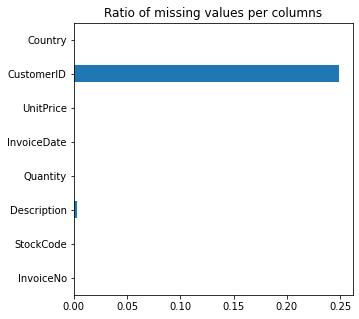

In [ ]:
#plot the null values
plt.figure(figsize=(5, 5))
ecom_data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")


we can't replace the missing values and we can't keep data without the value in the customer id columns, as here we are analysing on the customers

In [ ]:
#drop the data
ecom_data = ecom_data.dropna(subset=["CustomerID"])


lets visualize again the null values

Text(0.5, 1.0, 'Ratio of missing values per columns')

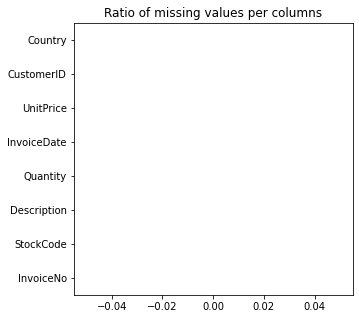

In [ ]:
plt.figure(figsize=(5,5))
ecom_data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

We did it there is no missing values. wait there must be duplicates entries lets check

In [ ]:
ecom_data.duplicated().sum()

5225

EDA on countries

In [ ]:
def unique(data):# number of unique data
  return data.nunique()
unique(ecom_data['Country']) # we have 37 unique countries

37

so 37 countries are there in dataset, lets look which country has more datas

In [ ]:
def count(data):
  return data.value_counts()
count(ecom_data['Country']) #seems data is more foccused on UK

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

Uk has highest data

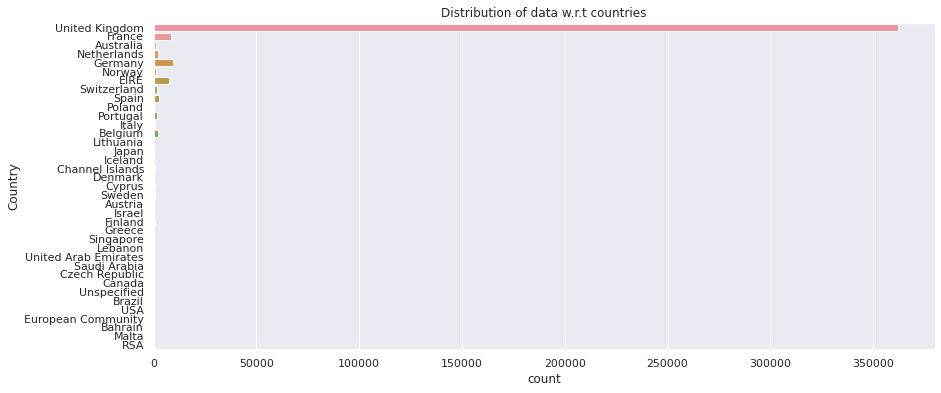

In [ ]:
#lets visualize the highest daata in UK
plt.figure(figsize=(14,6))
plt.title('Distribution of data w.r.t countries')
sns.countplot(y='Country', data=ecom_data)

In [ ]:
uk_count = ecom_data[ecom_data['Country'] == 'United Kingdom']['Country'].count()#count Uk data 
all_count = ecom_data['Country'].count()#count total no of data in all countries
uk_perc = uk_count/all_count# divide count in uk/ all countries
print(str(uk_perc*100))#get the percentage

88.95088599878574


Lets create revenue

revenue=unit*quantity

Revenue helps to get total spedning done. we have price on per unit and number of quantities.

In [ ]:
ecom_data['Revenue']=ecom_data['UnitPrice']*ecom_data['Quantity']#multiply two columns i.e. unit and quantity to get revenue

In [ ]:
ecom_data.head() #too look the data specially revenue column

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


spending per country, lets see which country has highest revenue or spending??

In [ ]:
ecom_data.groupby('Country').agg({'Revenue': lambda x: x.sum()})

,Revenue
Country,
Australia,137077.270
Austria,10154.320
Bahrain,548.400
Belgium,40910.960
Brazil,1143.600
Canada,3666.380
Channel Islands,20086.290
Cyprus,12946.290
Czech Republic,707.720


In [ ]:
#table = pd.pivot_table(spending_data, index =['Country']) #pivot table

In [ ]:
spending_data=pd.DataFrame(ecom_data,columns=['Revenue', 'Country']) #created a dataframe with revenue and country

In [ ]:
spending_data

,Revenue,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom
...,...,...
541904,10.20,France
541905,12.60,France
541906,16.60,France
541907,16.60,France


Lets visualize

In [ ]:
spending_data['Country'].nunique() #unique countries

37

In [ ]:
spending_data[spending_data['Country']=='United Kingdom'].count()/len(spending_data['Revenue']) # want to know about Uk spending

Revenue    0.889509
Country    0.889509
dtype: float64

from the data we can see 88% of the data have from United Kingdom, undoubtedly maximum of revenue or spending comes from UK

Lets deep in revenue

In [ ]:
ecom_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
ecom_data['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 406829, dtype: object

Lets figure out monthly revenue 

From here we can go to monthly customers

In [ ]:
import datetime as dt
ecom_data['InvoiceDate']=pd.to_datetime(ecom_data.InvoiceDate,format='%m/%d/%Y %H:%M')

In [ ]:
ecom_data["Month"] = ecom_data.InvoiceDate.dt.month

In [ ]:
revenue_data=ecom_data.groupby(['Month'])['Revenue'].sum().reset_index()

In [ ]:
revenue_data

,Month,Revenue
0,1,475074.380
1,2,436546.150
2,3,579964.610
3,4,426047.851
4,5,648251.080
5,6,608013.160
6,7,574238.481
7,8,616368.000
8,9,931440.372
9,10,974603.590


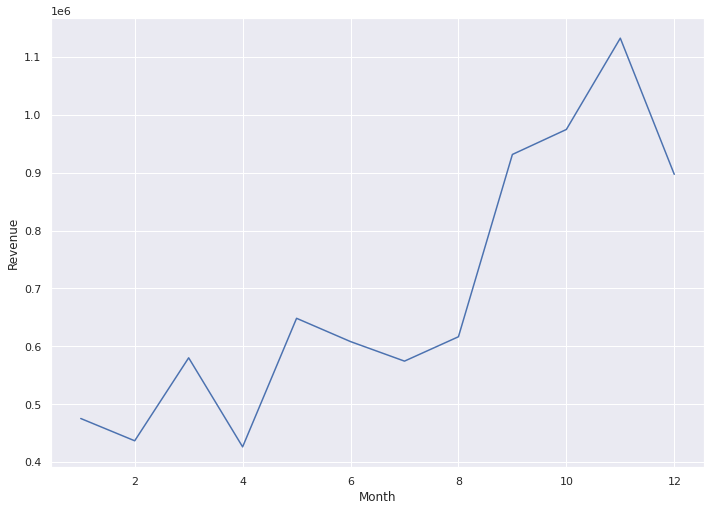

In [ ]:
#lets plot the data with month and revenue
sns.lineplot(x="Month", y="Revenue", data=revenue_data) 
plt.show()

As we can see revenue is growing,but what exactly happened on April. What can be the reason s for huge drop?
low activity from customers or less order by customer




In [ ]:
ecom_data_order_avg=ecom_data.groupby('Month')['Revenue'].mean()

In [ ]:
ecom_data_order_avg

Month
1     21.681014
2     21.438204
3     20.845540
4     18.365715
5     22.424626
6     21.842691
7     20.879881
8     22.282120
9     22.817118
10    19.224846
11    17.262839
12    20.154802
Name: Revenue, dtype: float64

In [ ]:
ecom_data['InvoiceYearMonth'] = ecom_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [ ]:
ecom_uk_data=ecom_data[ecom_data['Country']=='United Kingdom']

monthly_active=ecom_uk_data.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


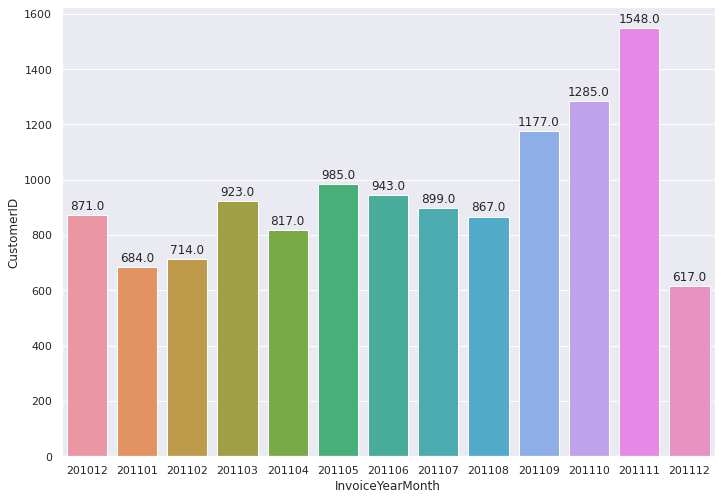

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot=sns.barplot(x='InvoiceYearMonth', y='CustomerID', data=monthly_active)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

You can see a drop in customer during the month of april compared to month of march, i.e. from 923 customers to 817 customers. We also found that customer in the month of january and feb there is a drop.

Now, customer is certainly decreased what about orders??
Lets check

In [ ]:
monthly_sales=ecom_uk_data.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
monthly_sales

,InvoiceYearMonth,Quantity
0,201012,252812
1,201101,198957
2,201102,211524
3,201103,272305
4,201104,247915
5,201105,296101
6,201106,274640
7,201107,297977
8,201108,301937
9,201109,447596


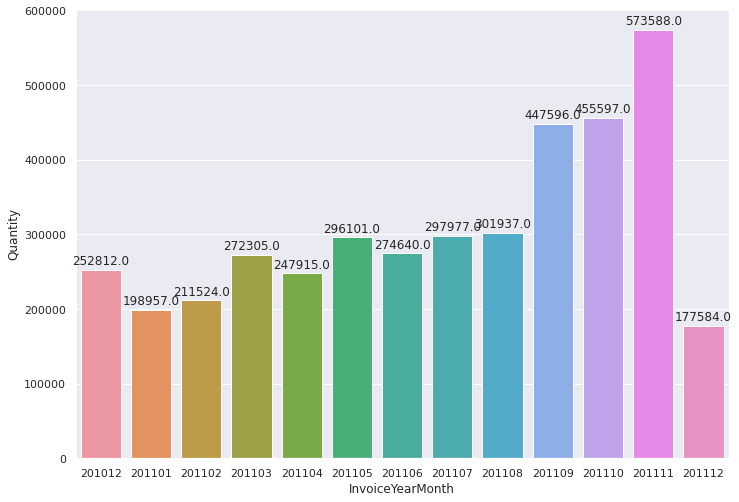

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot=sns.barplot(x='InvoiceYearMonth', y='Quantity', data=monthly_sales)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

its certainly decreasing on the month of april. on march no of orders was 272305 while on april it is 247915 as well as on the month of jan and feb.

Lets make some feature engineering, new customer and existing customer

How to choose new customer??
Lets try in this way,
a customer who purchsed in nearby days maybe lets figure out

In [ ]:
def minmax(value):
  min=value.min()
  max=value.max()
  return [min, max]
minmax(ecom_uk_data.InvoiceDate)

[Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00')]

In [ ]:
ecom_uk_data[ecom_uk_data['CustomerID']==17850.0]['InvoiceDate'].max()

Timestamp('2011-02-10 14:38:00')

ok 

In [ ]:
min_purchase=ecom_uk_data.groupby('CustomerID').InvoiceDate.min().reset_index()
min_purchase.columns=['CustomerID', 'MinPurchaseDate']
min_purchase['min_purchase_Date']=min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year +date.month)

In [ ]:
ecom_uk_data=pd.merge(ecom_uk_data, min_purchase, on='CustomerID')
ecom_uk_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,InvoiceYearMonth,MinPurchaseDate,min_purchase_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,201012,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,201012,2010-12-01 08:26:00,201012


In [ ]:
(ecom_uk_data['InvoiceYearMonth']>ecom_uk_data['min_purchase_Date']).value_counts()

True     256114
False    105764
dtype: int64

In [ ]:
ecom_uk_data['User']='New'
ecom_uk_data.loc[ecom_uk_data['InvoiceYearMonth']>ecom_uk_data['min_purchase_Date'], 'User']='Old'

In [ ]:
ecom_uk_data['min_purchase_Date']

0         201012
1         201012
2         201012
3         201012
4         201012
           ...  
361873    201112
361874    201112
361875    201112
361876    201112
361877    201112
Name: min_purchase_Date, Length: 361878, dtype: int64

In [ ]:
ecom_uk_data['User'].value_counts()

Old    256114
New    105764
Name: User, dtype: int64

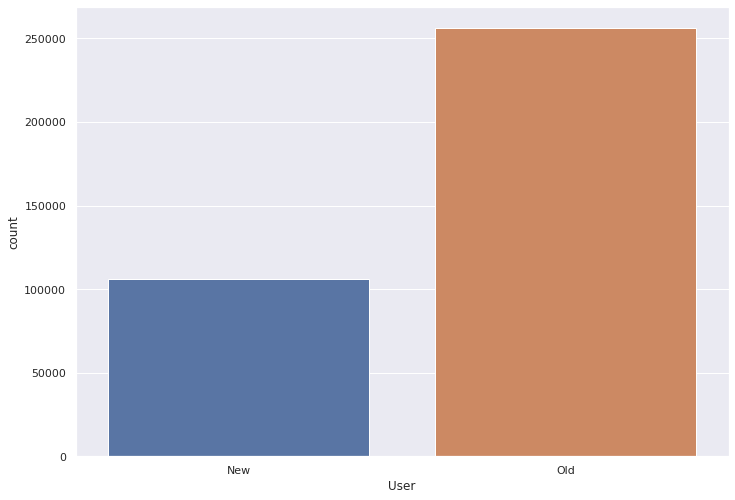

In [ ]:
sns.countplot(x='User',data=ecom_uk_data)

we found more old customers than new customers

In [ ]:
ecom_uk_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,InvoiceYearMonth,MinPurchaseDate,min_purchase_Date,User
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,201012,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2010-12-01 08:26:00,201012,New


In [ ]:
ecom_uk_data['cohort']=ecom_uk_data['InvoiceYearMonth']

In [ ]:
grouped = ecom_uk_data.groupby(['cohort', 'InvoiceYearMonth'])

In [ ]:
cohorts=grouped.agg({'Quantity': pd.Series.nunique,
                     'CustomerID': pd.Series.nunique,
                     'Revenue':np.sum})
cohorts.rename(columns={'Quantity':'Totalorders',
                        'CustomerID':'Totalusers'}, inplace=True)
cohorts.head()

,,Totalorders,Totalusers,Revenue
cohort,InvoiceYearMonth,,,
201012,201012,138,871.0,483799.740
201101,201101,123,684.0,351981.280
201102,201102,108,714.0,348853.630
201103,201103,123,923.0,456917.870
201104,201104,131,817.0,376744.411


In [ ]:
def cohort(data):
  data['cohortperiod']=np.arange(len(data))+1
  return data
cohorts=cohorts.groupby(level=0).apply(cohort) 
cohorts.head() 

,,Totalorders,Totalusers,Revenue,cohortperiod
cohort,InvoiceYearMonth,,,,
201012,201012,138,871.0,483799.740,1
201101,201101,123,684.0,351981.280,1
201102,201102,108,714.0,348853.630,1
201103,201103,123,923.0,456917.870,1
201104,201104,131,817.0,376744.411,1


In [ ]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort', 'InvoiceYearMonth'], inplace=True)

cohort_group_size = cohorts['Totalusers'].groupby(level=0).first()
cohort_group_size.head()

cohort
201012    871.0
201101    684.0
201102    714.0
201103    923.0
201104    817.0
Name: Totalusers, dtype: float64

In [ ]:
cohorts['Totalusers'].head()

cohort  InvoiceYearMonth
201012  201012              871.0
201101  201101              684.0
201102  201102              714.0
201103  201103              923.0
201104  201104              817.0
Name: Totalusers, dtype: float64

In [ ]:
cohorts.reset_index(inplace=True)
cohorts

,cohort,InvoiceYearMonth,Totalorders,Totalusers,Revenue,cohortperiod
0,201012,201012,138,871.0,483799.740,1
1,201101,201101,123,684.0,351981.280,1
2,201102,201102,108,714.0,348853.630,1
3,201103,201103,123,923.0,456917.870,1
4,201104,201104,131,817.0,376744.411,1
5,201105,201105,131,985.0,525573.350,1
6,201106,201106,145,943.0,472509.250,1
7,201107,201107,137,899.0,461147.601,1
8,201108,201108,162,867.0,477008.410,1
9,201109,201109,180,1177.0,776529.842,1


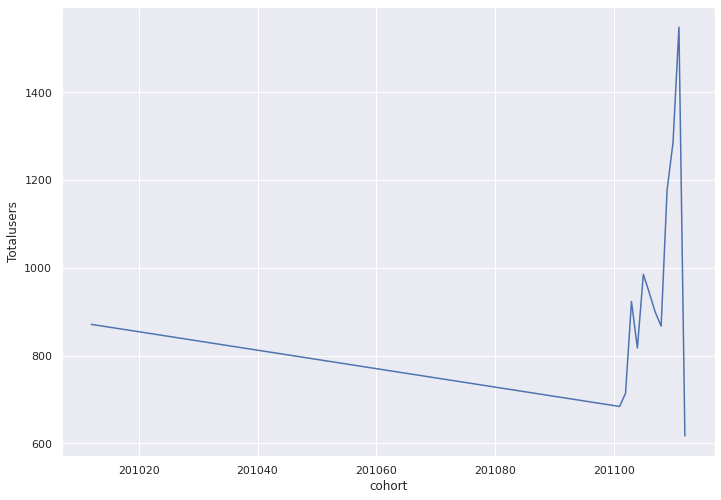

In [ ]:
sns.lineplot(x="cohort", y="Totalusers",data=cohorts) 

As we can see as time passes more users buys product which is a good sign for the company

RFM

Recency, Frequency, monitary

**A low recency and frequency score** - not active recently or frequently.

**A high recency and frequency** - users highly active recently and frequently



we will focus on U.K. as majority of data is based on this particular country

In [ ]:
ecom_uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,InvoiceYearMonth,MinPurchaseDate,min_purchase_Date,User,cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,201012,2010-12-01 08:26:00,201012,New,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2010-12-01 08:26:00,201012,New,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,201012,2010-12-01 08:26:00,201012,New,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2010-12-01 08:26:00,201012,New,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2010-12-01 08:26:00,201012,New,201012


In [ ]:
ecom_uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 361877
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          361878 non-null  object        
 1   StockCode          361878 non-null  object        
 2   Description        361878 non-null  object        
 3   Quantity           361878 non-null  int64         
 4   InvoiceDate        361878 non-null  datetime64[ns]
 5   UnitPrice          361878 non-null  float64       
 6   CustomerID         361878 non-null  float64       
 7   Country            361878 non-null  object        
 8   Revenue            361878 non-null  float64       
 9   Month              361878 non-null  int64         
 10  InvoiceYearMonth   361878 non-null  int64         
 11  MinPurchaseDate    361878 non-null  datetime64[ns]
 12  min_purchase_Date  361878 non-null  int64         
 13  User               361878 non-null  object  

Recency and monetary

Recency- freshness of the customers activity  

from data(customerID, date)

monetary-spending and purchasing power of customer

fromdata (Revenue)

frequency= frequency of customer transaction or visit

from data(customerId, revenue)

In [ ]:
today = dt.datetime(2012,1,1)
data_RM=ecom_uk_data.groupby('CustomerID').agg({'Revenue': lambda x: x.sum(), 'InvoiceDate': lambda x:(today-x.max()).days})
data_sc=ecom_uk_data.groupby(['CustomerID', 'InvoiceNo']).agg({'Revenue':lambda x:x.sum()})
data_f=data_sc.groupby('CustomerID').agg({'Revenue': lambda x:len(x)})

In [ ]:
rfm_table= pd.merge(data_RM,data_f, on='CustomerID')
rfm_table

,Revenue_x,InvoiceDate,Revenue_y
CustomerID,,,
12346.0,0.00,347,2.0
12747.0,4196.01,24,11.0
12748.0,29072.10,22,224.0
12749.0,3868.20,25,8.0
12820.0,942.34,25,4.0
...,...,...,...
18280.0,180.60,299,1.0
18281.0,80.82,202,1.0
18282.0,176.60,29,3.0


In [ ]:
rfm_table.rename(columns={'InvoiceDate':'Recency',
                          'Revenue_y': 'Frequency',
                          'Revenue_x':'Monetary'}, inplace=True
                          )
rfm_table

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,0.00,347,2.0
12747.0,4196.01,24,11.0
12748.0,29072.10,22,224.0
12749.0,3868.20,25,8.0
12820.0,942.34,25,4.0
...,...,...,...
18280.0,180.60,299,1.0
18281.0,80.82,202,1.0
18282.0,176.60,29,3.0


In [ ]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Recency 
rfm_table['r_quartile'] = rfm_table['Recency'].apply(RScore, args=('Recency',quantiles,))
# Frequency
rfm_table['Freq_quartile'] = rfm_table['Frequency'].apply(FScore, args=('Frequency',quantiles,))
#monetary
rfm_table['m_quartile'] = rfm_table['Monetary'].apply(FScore, args=('Monetary',quantiles,))



In [ ]:
rfm_table.head()

,Monetary,Recency,Frequency,r_quartile,Freq_quartile,m_quartile
CustomerID,,,,,,
12346.0,0.00,347,2.0,4,3,4
12747.0,4196.01,24,11.0,1,1,1
12748.0,29072.10,22,224.0,1,1,1
12749.0,3868.20,25,8.0,1,1,1
12820.0,942.34,25,4.0,1,2,2


In [ ]:
# top 5 best customers
rfm_table.sort_values('Monetary', ascending=False).head()

,Monetary,Recency,Frequency,r_quartile,Freq_quartile,m_quartile
CustomerID,,,,,,
18102.0,256438.49,22,62.0,1,1,1
17450.0,187482.17,30,55.0,1,1,1
17511.0,88125.38,24,46.0,1,1,1
16684.0,65892.08,26,31.0,1,1,1
13694.0,62653.10,25,60.0,1,1,1


In [ ]:
#5 loyal customers - high frequency
rfm_table.sort_values('Frequency', ascending=False).head()

,Monetary,Recency,Frequency,r_quartile,Freq_quartile,m_quartile
CustomerID,,,,,,
12748.0,29072.10,22,224.0,1,1,1
17841.0,40340.78,23,169.0,1,1,1
14606.0,11713.85,23,128.0,1,1,1
13089.0,57385.88,24,118.0,1,1,1
15311.0,59419.34,22,118.0,1,1,1


In [ ]:
# 5 customers to churn - low recency
rfm_table.sort_values('Recency').head()

,Monetary,Recency,Frequency,r_quartile,Freq_quartile,m_quartile
CustomerID,,,,,,
17428.0,17078.45,22,33.0,1,1,1
14051.0,15477.34,22,26.0,1,1,1
16954.0,2085.08,22,9.0,1,1,1
17001.0,3989.57,22,11.0,1,1,1
16626.0,4379.65,22,20.0,1,1,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

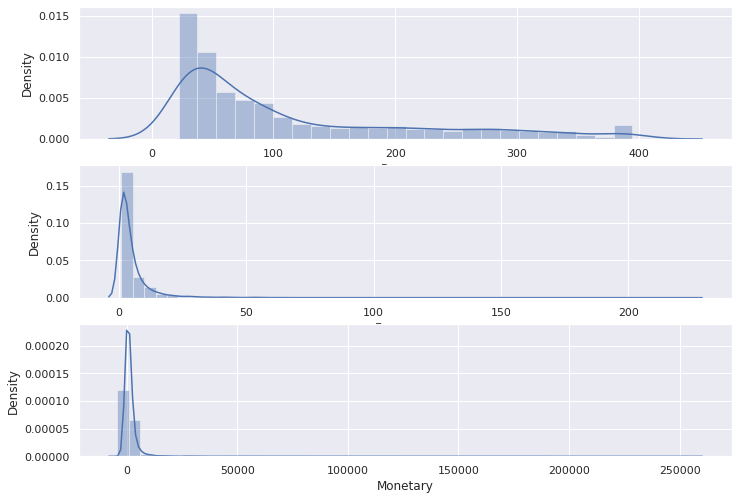

In [ ]:
#visualize
plt.subplot(3,1,1)
sns.distplot(rfm_table['Recency'])
plt.subplot(3,1,2)
sns.distplot(rfm_table['Frequency'])
plt.subplot(3,1,3)
sns.distplot(rfm_table['Monetary'])
plt.show()

In [ ]:
rfm_table['RFM_sum']=rfm_table[['Freq_quartile','r_quartile','m_quartile']].sum(axis=1)

In [ ]:
def rfm_level(data):
  if data['RFM_sum']>=9:
    return 'dont loose'
  elif ((data['RFM_sum']>=8)and (data['RFM_sum']<9)):
    return 'champions'
  elif ((data['RFM_sum']>=7)and (data['RFM_sum']<8)):
    return 'Loyal'
  elif ((data['RFM_sum']>=6) and (data['RFM_sum']<7)):
    return 'Potential'
  elif ((data['RFM_sum']>=5) and (data['RFM_sum']<6)):
    return 'Promising'
  elif ((data['RFM_sum']>=4) and (data['RFM_sum']<5)):
    return 'needs Attention'
  else:
    return 'Require Activation'            

rfm_table['RFM_Level'] = rfm_table.apply(rfm_level, axis=1)    
rfm_table.head()


,Monetary,Recency,Frequency,r_quartile,Freq_quartile,m_quartile,RFM_sum,RFM_Level
CustomerID,,,,,,,,
12346.0,0.00,347,2.0,4,3,4,11,dont loose
12747.0,4196.01,24,11.0,1,1,1,3,Require Activation
12748.0,29072.10,22,224.0,1,1,1,3,Require Activation
12749.0,3868.20,25,8.0,1,1,1,3,Require Activation
12820.0,942.34,25,4.0,1,2,2,5,Promising


In [ ]:
rfm_table["RFM_Level"].value_counts()

dont loose            1719
Require Activation     442
champions              427
Potential              365
Loyal                  343
needs Attention        339
Promising              315
Name: RFM_Level, dtype: int64

Kmeans

In [ ]:
rfm_table.reset_index(level=0, inplace=True) 

In [ ]:
recency=rfm_table[['CustomerID', 'Recency']]

In [ ]:
recency

,CustomerID,Recency
0,12346.0,347
1,12747.0,24
2,12748.0,22
3,12749.0,25
4,12820.0,25
...,...,...
3945,18280.0,299
3946,18281.0,202
3947,18282.0,29
3948,18283.0,25


KMEANS CLUSTERING

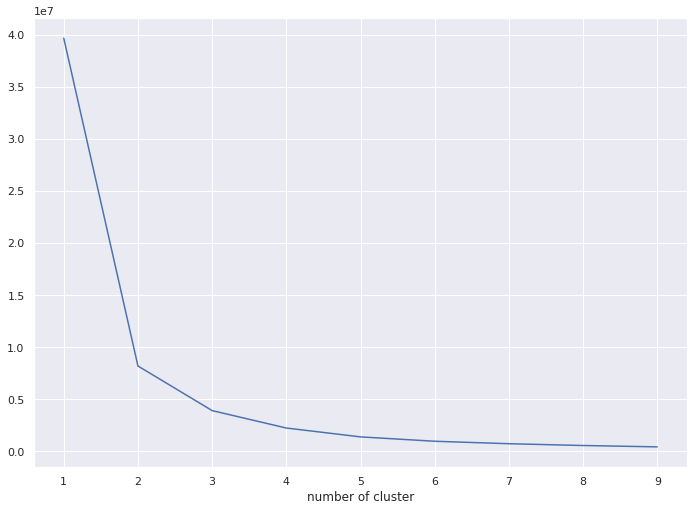

In [ ]:
from sklearn.cluster import KMeans
dic={}
recency_=recency[['Recency']]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i, max_iter=1000).fit(recency_)
  recency_['clusters']=kmeans.labels_
  dic[i]=kmeans.inertia_
plt.figure()  
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel("number of cluster")
plt.show()

3 is optimal one 

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(recency[['Recency']])
recency['Cluster']=kmeans.predict(recency[['Recency']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
recency['Cluster'].nunique()

3

In [ ]:
recency.groupby('Cluster').mean()

,CustomerID,Recency
Cluster,,
0,15552.233283,53.103681
1,15572.098093,177.636240
2,15595.759928,317.471119


Cluster 0 seems to be doing more recent purchases compared to other clusters but having fewer customer, while cluster 1 we find low among the others but high customers are there in this group

Frequency

In [ ]:
frequency=rfm_table[['CustomerID', 'Frequency']]
frequency

,CustomerID,Frequency
0,12346.0,2.0
1,12747.0,11.0
2,12748.0,224.0
3,12749.0,8.0
4,12820.0,4.0
...,...,...
3945,18280.0,1.0
3946,18281.0,1.0
3947,18282.0,3.0
3948,18283.0,16.0


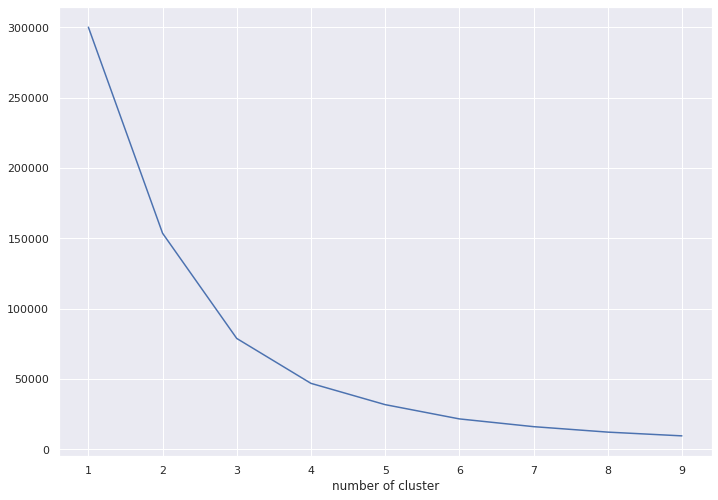

In [ ]:
from sklearn.cluster import KMeans
dic={}
frequency_=frequency[['Frequency']]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i, max_iter=1000).fit(frequency_)
  frequency_['clusters']=kmeans.labels_
  dic[i]=kmeans.inertia_
plt.figure()  
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel("number of cluster")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(frequency[['Frequency']])
frequency['Cluster_freq']=kmeans.predict(frequency[['Frequency']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
frequency.groupby('Cluster_freq').mean()

,CustomerID,Frequency
Cluster_freq,,
0,15567.194727,3.321340
1,14695.200000,116.400000
2,15528.120401,22.073579


cluster 2 customers Frequently orders

Monetary

In [ ]:
monetary=rfm_table[['Monetary','CustomerID']]
monetary

,Monetary,CustomerID
0,0.00,12346.0
1,4196.01,12747.0
2,29072.10,12748.0
3,3868.20,12749.0
4,942.34,12820.0
...,...,...
3945,180.60,18280.0
3946,80.82,18281.0
3947,176.60,18282.0
3948,2094.88,18283.0


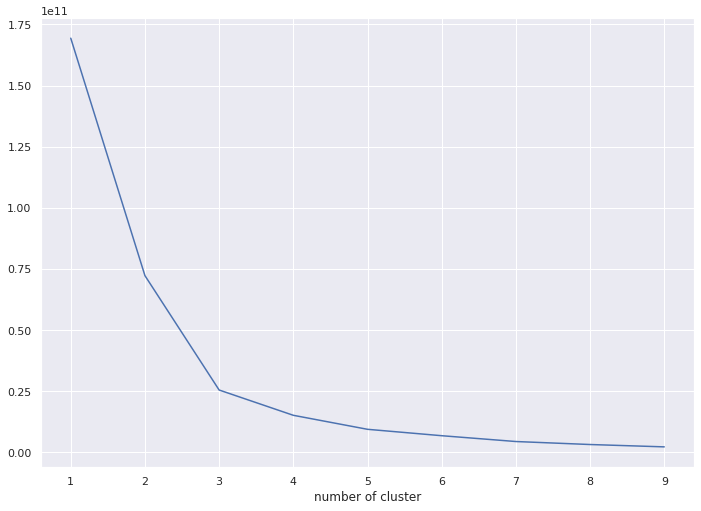

In [ ]:
from sklearn.cluster import KMeans
dic={}
monetary_=monetary[['Monetary']]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i, max_iter=1000).fit(monetary_)
  monetary_['clusters_monetary']=kmeans.labels_
  dic[i]=kmeans.inertia_
plt.figure()  
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel("number of cluster")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(monetary[['Monetary']])
monetary['Cluster_monetary']=kmeans.predict(monetary[['Monetary']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
monetary.groupby('Cluster_monetary').mean()

,Monetary,CustomerID
Cluster_monetary,,
0,43070.445185,15140.481481
1,221960.330000,17776.000000
2,1316.258790,15563.802856


mostly cluster 2 seems more purchases among the clusters

In [ ]:
rfm_table['Frequency_cluster']=frequency['Cluster_freq']

In [ ]:
rfm_table['Monetary_cluster']=monetary['Cluster_monetary']

In [ ]:
rfm_table['rececny_cluster']=recency['Cluster']

In [ ]:
rfm_table.head()

,CustomerID,Monetary,Recency,Frequency,r_quartile,Freq_quartile,m_quartile,RFM_sum,RFM_Level,Frequency_cluster,Monetary_cluster,rececny_cluster
0,12346.0,0.00,347,2.0,4,3,4,11,dont loose,0,2,2
1,12747.0,4196.01,24,11.0,1,1,1,3,Require Activation,0,2,0
2,12748.0,29072.10,22,224.0,1,1,1,3,Require Activation,1,0,0
3,12749.0,3868.20,25,8.0,1,1,1,3,Require Activation,0,2,0
4,12820.0,942.34,25,4.0,1,2,2,5,Promising,0,2,0


In [ ]:
rfm_table['total_score']=rfm_table['rececny_cluster']+rfm_table['Frequency_cluster']+rfm_table['Monetary_cluster']
rfm_table.head()

,CustomerID,Monetary,Recency,Frequency,r_quartile,Freq_quartile,m_quartile,RFM_sum,RFM_Level,Frequency_cluster,Monetary_cluster,rececny_cluster,total_score
0,12346.0,0.00,347,2.0,4,3,4,11,dont loose,0,2,2,4
1,12747.0,4196.01,24,11.0,1,1,1,3,Require Activation,0,2,0,2
2,12748.0,29072.10,22,224.0,1,1,1,3,Require Activation,1,0,0,1
3,12749.0,3868.20,25,8.0,1,1,1,3,Require Activation,0,2,0,2
4,12820.0,942.34,25,4.0,1,2,2,5,Promising,0,2,0,2


In [ ]:
rfm_table.groupby('total_score')['Recency','Frequency','Monetary'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Recency,Frequency,Monetary
total_score,,,
1,30.428571,123.000000,42643.401429
2,55.340900,4.277848,1537.260300
3,176.659864,3.068027,1276.543498
4,224.343864,7.851762,2243.469089
5,166.000000,13.500000,3640.675000
6,306.500000,24.000000,6515.050000


In [ ]:
rfm_table

,CustomerID,Monetary,Recency,Frequency,r_quartile,Freq_quartile,m_quartile,RFM_sum,RFM_Level,Frequency_cluster,Monetary_cluster,rececny_cluster,total_score
0,12346.0,0.00,347,2.0,4,3,4,11,dont loose,0,2,2,4
1,12747.0,4196.01,24,11.0,1,1,1,3,Require Activation,0,2,0,2
2,12748.0,29072.10,22,224.0,1,1,1,3,Require Activation,1,0,0,1
3,12749.0,3868.20,25,8.0,1,1,1,3,Require Activation,0,2,0,2
4,12820.0,942.34,25,4.0,1,2,2,5,Promising,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,180.60,299,1.0,4,4,4,12,dont loose,0,2,2,4
3946,18281.0,80.82,202,1.0,4,4,4,12,dont loose,0,2,1,3
3947,18282.0,176.60,29,3.0,1,3,4,8,champions,0,2,0,2
3948,18283.0,2094.88,25,16.0,1,1,1,3,Require Activation,2,2,0,4


In [ ]:
rfm_table['label']='value'
rfm_table.loc[rfm_table['total_score']<=2, 'label']='Low'
rfm_table.loc[rfm_table['total_score']>2, 'label']='High'

In [ ]:
rfm_table['label'].nunique()

2

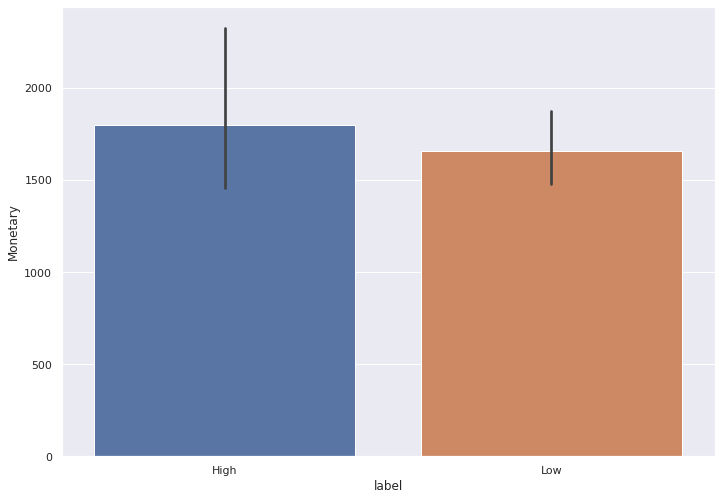

In [ ]:
sns.barplot(x='label', y='Monetary', data=rfm_table)

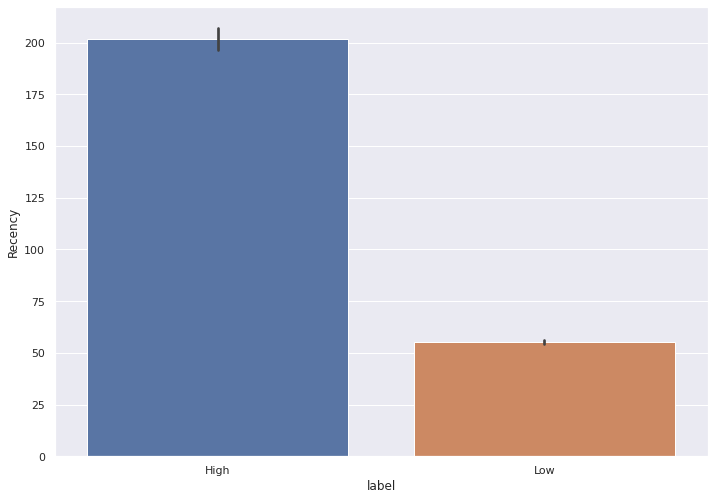

In [ ]:
sns.barplot(x='label', y='Recency', data=rfm_table)

Improve retention for high labels

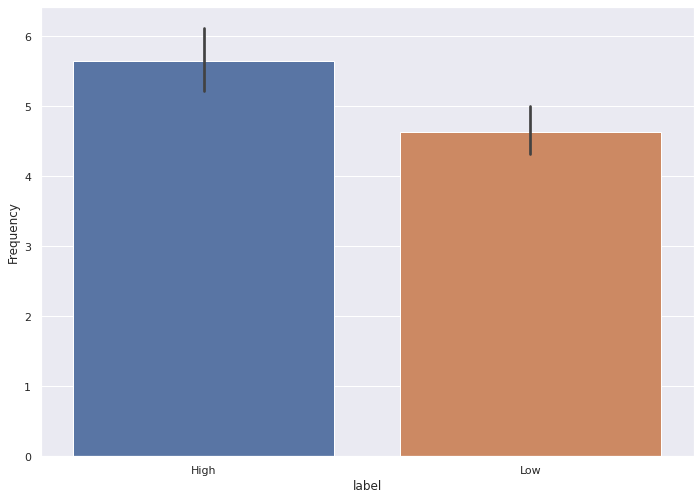

In [ ]:
sns.barplot(x='label', y='Frequency', data=rfm_table) 

Increase Fequency for low values

CLV- Customer life time value

1.How to Identify the most profitable 
customers?

2.How can a company offer the best product and make the most money?

3.How to segment profitable customers?

4.How much budget needs to spend to acquire customers?

**CLTV** = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit marginCustomer Value = Average Order Value * Purchase Frequency]


**Average Order Value** = Total Revenue / Total Number of Orders


**Purchase Frequency** = Total Number of Orders / Total Number of Customers

Churn Rate: Churn Rate is the percentage of customers who have not ordered again.

Customer Lifetime: Customer Lifetime is the period of time that customer has been continuously ordering.

**Customer Lifetime**=1/Churn Rate

source - datacamp

In [ ]:
import time


In [ ]:
ecom_uk_data_clv=ecom_uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days, 'InvoiceNo': lambda num: len(num),'Quantity': lambda quant: quant.sum(),'Revenue': lambda price: price.sum()})


In [ ]:
ecom_uk_data_clv

,InvoiceDate,InvoiceNo,Quantity,Revenue
CustomerID,,,,
12346.0,0,2,0,0.00
12747.0,366,103,1275,4196.01
12748.0,372,4642,24210,29072.10
12749.0,209,231,1422,3868.20
12820.0,323,59,722,942.34
...,...,...,...,...
18280.0,0,10,45,180.60
18281.0,0,7,54,80.82
18282.0,118,13,98,176.60


In [ ]:
#lets calculate CLTV
#1. Average order value
ecom_uk_data_clv['avg_order_val']=ecom_uk_data_clv['Revenue']/ecom_uk_data_clv['InvoiceNo']
#


In [ ]:
#2. Calculate Purchase Frequency
purchase_frequency=sum(ecom_uk_data_clv['InvoiceNo'])/ecom_uk_data_clv.shape[0]

In [ ]:
#Calculate Repeat Rate and Churn Rate
repeat_rate=ecom_uk_data_clv[ecom_uk_data_clv.InvoiceNo > 1].shape[0]/ecom_uk_data_clv.shape[0]

In [ ]:
repeat_rate # we have very high repeat rate

0.9807594936708861

In [ ]:
churn_rate=1-repeat_rate

In [ ]:
#profit margin
ecom_uk_data_clv['profit_margin']=ecom_uk_data_clv['Revenue']*0.05

In [ ]:
#clv
ecom_uk_data_clv['CLV']=(ecom_uk_data_clv['avg_order_val']*purchase_frequency)/churn_rate

In [ ]:
ecom_uk_data_clv['Customer_lifetime_value']=ecom_uk_data_clv['CLV']*ecom_uk_data_clv['profit_margin']

In [ ]:
ecom_uk_data_clv.head()

,InvoiceDate,InvoiceNo,Quantity,Revenue,avg_order_val,profit_margin,CLV,Customer_lifetime_value
CustomerID,,,,,,,,
12346.0,0,2,0,0.00,0.000000,0.0000,0.000000,0.000000e+00
12747.0,366,103,1275,4196.01,40.737961,209.8005,193975.946191,4.069625e+07
12748.0,372,4642,24210,29072.10,6.262839,1453.6050,29820.838919,4.334772e+07
12749.0,209,231,1422,3868.20,16.745455,193.4100,79734.363158,1.542142e+07
12820.0,323,59,722,942.34,15.971864,47.1170,76050.872997,3.583289e+06


In [ ]:
ecom_uk_data_clv.reset_index(inplace=True)

time series

In [ ]:
ecom_uk_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,InvoiceYearMonth,MinPurchaseDate,min_purchase_Date,User,cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,201012,2010-12-01 08:26:00,201012,New,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2010-12-01 08:26:00,201012,New,201012


In [ ]:
len(ecom_uk_data)

361878

In [ ]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt
from statistics import mean, stdev

In [ ]:
ecom_uk_data['InvoiceDate'] = pd.to_datetime(ecom_uk_data['InvoiceDate']).dt.date
ecom_uk_data['InvoiceDate'].nunique()


305

In [ ]:
group=ecom_uk_data.groupby(pd.Grouper(key='InvoiceDate')).agg({'Revenue':'sum'})

In [ ]:
group.reset_index(inplace=True)

In [ ]:
pd.to_datetime(group['InvoiceDate'], format="%Y-%m-%d")

0     2010-12-01
1     2010-12-02
2     2011-02-10
3     2011-01-06
4     2011-02-03
         ...    
300   2011-05-26
301   2011-02-09
302   2011-02-16
303   2011-03-06
304   2011-05-15
Name: InvoiceDate, Length: 305, dtype: datetime64[ns]

No handles with labels found to put in legend.


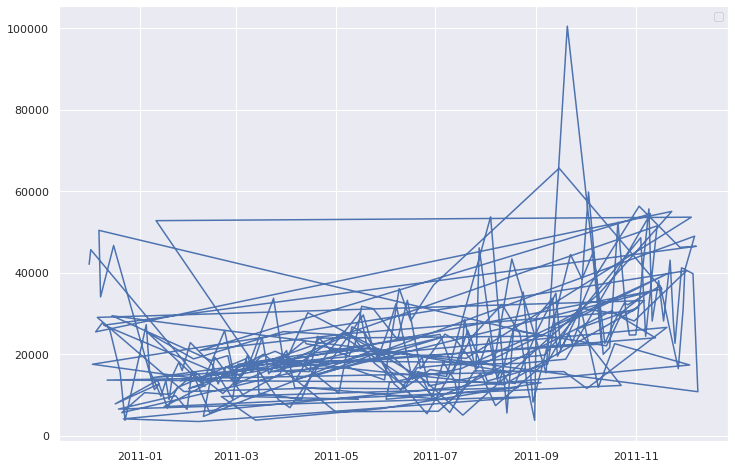

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(group['InvoiceDate'], group['Revenue'])
plt.legend(loc='best')
plt.show()

In [ ]:
group['Revenue'].describe()

count       305.000000
mean      22189.748833
std       12748.647029
min        3457.110000
25%       13566.450000
50%       18844.270000
75%       27925.080000
max      100460.380000
Name: Revenue, dtype: float64

In [ ]:
def percentile(data, n):
  return np.percentile(data,n)   
  

print('95tpercentile',percentile(group['Revenue'], 95))
print('97th',percentile(group['Revenue'], 97))
print('99th',percentile(group['Revenue'], 99))  

  

95tpercentile 46656.05799999988
97th 52699.86920000002
99th 56268.18919999979


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


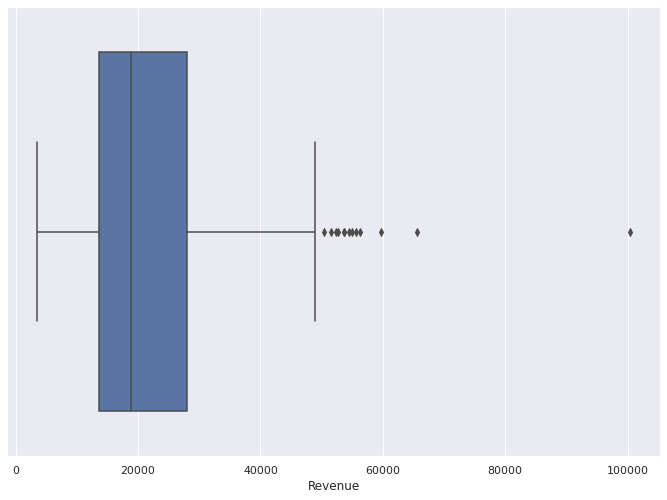

In [ ]:
sns.boxplot(group['Revenue'])

In [ ]:
def IQR(data,n1,n2):
  Iqr=((np.percentile(data,n1))-(np.percentile(data, n2)))
  value=(np.percentile(data, n1) +(1.5*(Iqr)))
  return value

In [ ]:
print(IQR(group['Revenue'], 75, 25))
val=IQR(group['Revenue'], 75, 25)


49463.0250000001


In [ ]:
group=group.loc[group['Revenue']<val]

In [ ]:
group

,InvoiceDate,Revenue
0,2010-12-01,42030.85
1,2010-12-02,45622.08
2,2011-02-10,12056.08
3,2011-01-06,25238.41
4,2011-02-03,18821.80
...,...,...
300,2011-05-26,21303.69
301,2011-02-09,4715.21
302,2011-02-16,19220.55
303,2011-03-06,9588.28


There are 13 points greater than val

Decompose Series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_series = seasonal_decompose(group['Revenue'], freq=6)

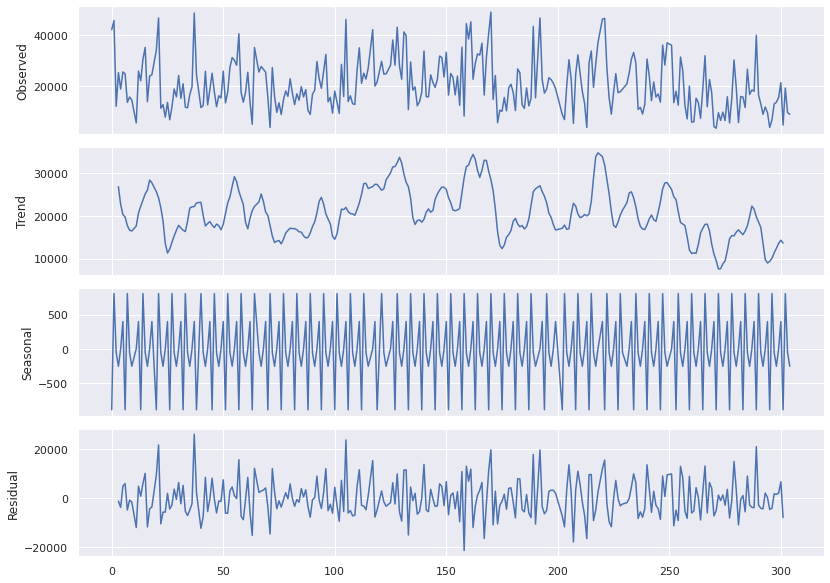

In [ ]:
decomposed_series.plot()
plt.show()

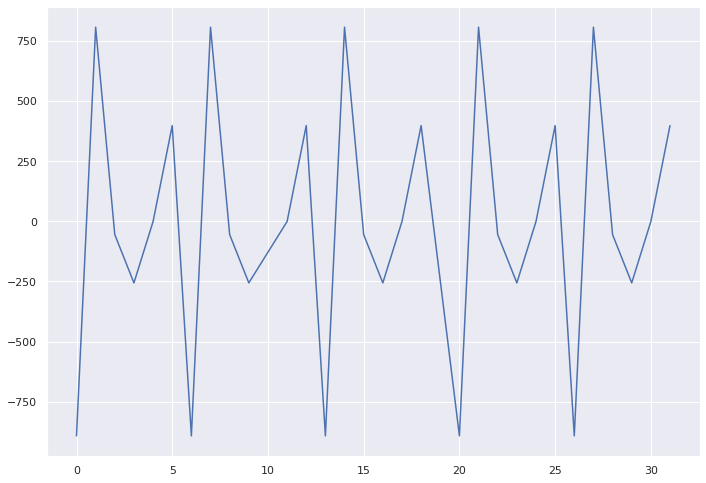

In [ ]:
decomposed_series.seasonal[0:30].plot()

pattern repeats 7 times
This suggests weekly seasonality in the data

In [ ]:
import datetime as dt
data = pd.DataFrame({"year": pd.to_datetime(group['InvoiceDate']).dt.year,
                          "month": pd.to_datetime(group['InvoiceDate']).dt.month,
                          "day": pd.to_datetime(group['InvoiceDate']).dt.day,
                          "weekday": pd.to_datetime(group['InvoiceDate']).dt.dayofweek,
                          "weekday_name": pd.to_datetime(group['InvoiceDate']).dt.strftime("%A"),
                          "dayofyear": pd.to_datetime(group['InvoiceDate']).dt.dayofyear,
                          "dayofyear": pd.to_datetime(group['InvoiceDate']).dt.dayofyear,
                          "dayofyear": pd.to_datetime(group['InvoiceDate']).dt.dayofyear,
                          "week": pd.to_datetime(group['InvoiceDate']).dt.week,
                          "quarter": pd.to_datetime(group['InvoiceDate']).dt.quarter,
                         })

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
data


,year,month,day,weekday,weekday_name,dayofyear,week,quarter
0,2010,12,1,2,Wednesday,335,48,4
1,2010,12,2,3,Thursday,336,48,4
2,2011,2,10,3,Thursday,41,6,1
3,2011,1,6,3,Thursday,6,1,1
4,2011,2,3,3,Thursday,34,5,1
...,...,...,...,...,...,...,...,...
300,2011,5,26,3,Thursday,146,21,2
301,2011,2,9,2,Wednesday,40,6,1
302,2011,2,16,2,Wednesday,47,7,1
303,2011,3,6,6,Sunday,65,9,1


In [ ]:
data = pd.concat([data, group['Revenue']], axis=1)
data.head()

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,Revenue
0,2010,12,1,2,Wednesday,335,48,4,42030.85
1,2010,12,2,3,Thursday,336,48,4,45622.08
2,2011,2,10,3,Thursday,41,6,1,12056.08
3,2011,1,6,3,Thursday,6,1,1,25238.41
4,2011,2,3,3,Thursday,34,5,1,18821.80


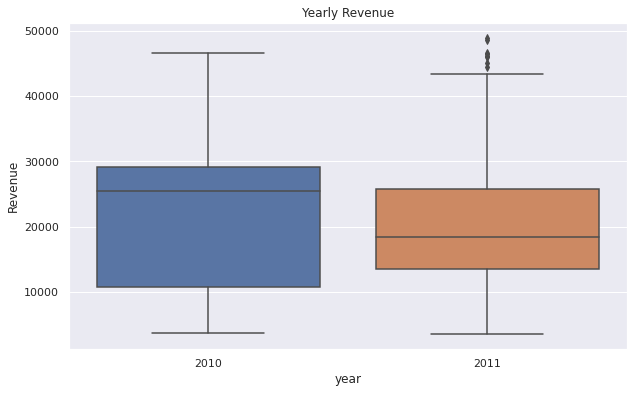

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x=data['year'], y=data['Revenue'], )
plt.title('Yearly Revenue')
plt.show()

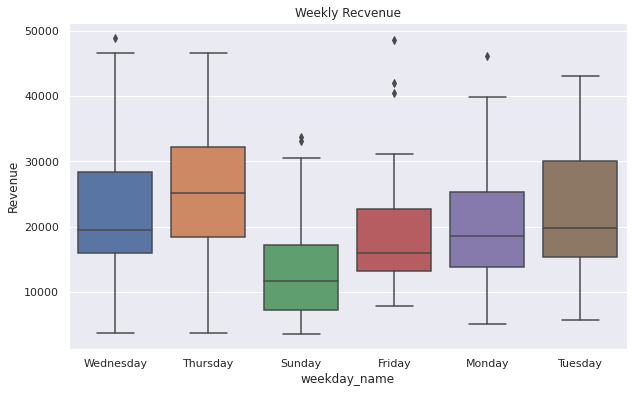

In [ ]:
#weekly revenue
plt.figure(figsize=(10,6))

sns.boxplot(x=data['weekday_name'], y=data['Revenue'], )
plt.title('Weekly Recvenue')
plt.show()

we see thursdays are high revenue days, we dont get much revenue in weekends

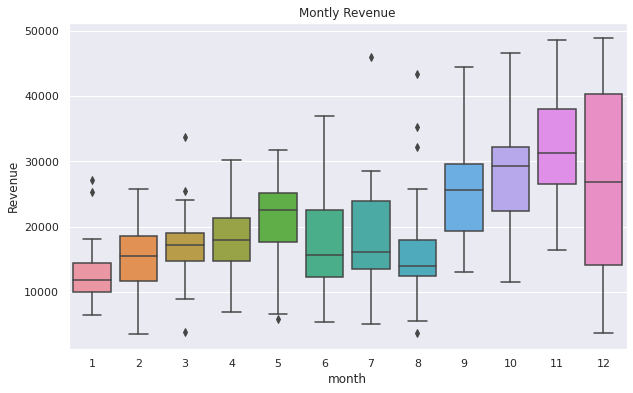

In [ ]:
#monthly revenue
plt.figure(figsize=(10,6))

sns.boxplot(x=data['month'], y=data['Revenue'], )
plt.title('Montly Revenue')
plt.show()

during end of the months we get good amount of revenue or Average revenues are higher towards the end of the year

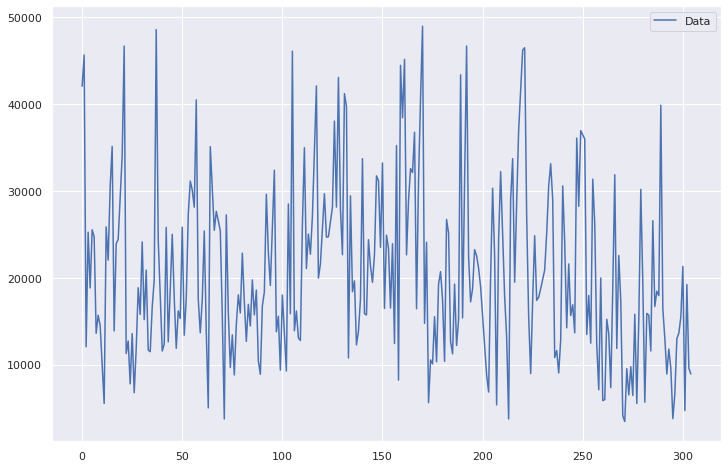

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(data.index, data['Revenue'], label = 'Data')
plt.legend(loc='best')
plt.show()

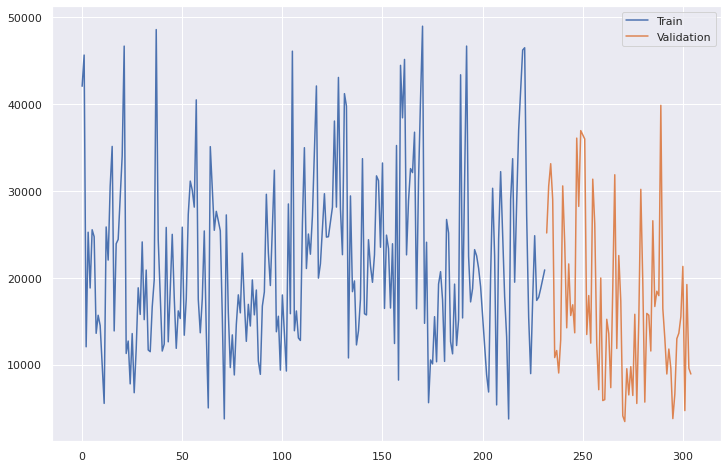

In [ ]:
train_data = data[:220]
valid_data = data[220:]
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Revenue'], label='Train')
plt.plot(valid_data.index, valid_data['Revenue'], label='Validation')
plt.legend(loc='best')
plt.show()

In [ ]:
def rmsle(actual, preds):
    for i in range(0,len(preds)):
        if preds[i]<0:
            preds[i] = 0
        else:
            pass
    
    error = (sqrt(mean_squared_log_error(actual, preds)))*100
    return error

In [ ]:
#Holt's Winters
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(np.asarray(train_data['Revenue']), seasonal_periods=6, trend='add', seasonal='add')
model = model.fit(smoothing_level=0.2, smoothing_slope=0.001, smoothing_seasonal=0.2)
    
# predictions and evaluation
preds = model.forecast(len(valid_data)) 
score = rmsle(valid_data['Revenue'], preds)

# results
print('RMSLE for Holt Winter is:', score)

RMSLE for Holt Winter is: 69.74135653126498


In [ ]:
from itertools import product
from tqdm import tqdm_notebook

In [ ]:
level = [0.1, 0.3, 0.5, 0.8]
smoothing_slope = [0.0001, 0.001, 0.05] 
smoothing_seasonal = [0.2, 0.4, 0.6]

# creating list with all the possible combinations of parameters
parameters = product(level, smoothing_slope, smoothing_seasonal)
parameters_list = list(parameters)
len(parameters_list)

36

In [ ]:
def grid_search(parameters_list):
    
    results = []
    best_error_ = float("inf")

    for param in tqdm_notebook(parameters_list):
        #training the model
        model = ExponentialSmoothing(np.asarray(train_data['Revenue']), seasonal_periods=6, trend='add', seasonal='add')
        model = model.fit(smoothing_level=param[0], smoothing_slope=param[1], smoothing_seasonal=param[2])

        # predictions and evaluation
        preds = model.forecast(len(valid_data)) 
        score = rmsle(valid_data['Revenue'], preds)
        
        # saving best model, rmse and parameters
        if score < best_error_:
            best_model = model
            best_error_ = score
            best_param = param
        results.append([param, score])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'RMSLE']
    
    
    # sorting in ascending order, the lower rmse is - the better
    result_table = result_table.sort_values(by='RMSLE', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
result_table = grid_search(parameters_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
result_table.parameters[0]

(0.8, 0.05, 0.2)

In [ ]:
#training the model # use functions
model = ExponentialSmoothing(np.asarray(train_data['Revenue']), seasonal_periods=6, trend='add', seasonal='add')
model = model.fit(smoothing_level=0.1, smoothing_slope=0.0001, smoothing_seasonal=0.2)
    
# predictions and evaluation
preds = model.forecast(len(valid_data)) 
score = rmsle(valid_data['Revenue'], preds)

# results
print('RMSLE for Holt Winter is:', score)

RMSLE for Holt Winter is: 73.57666957436435


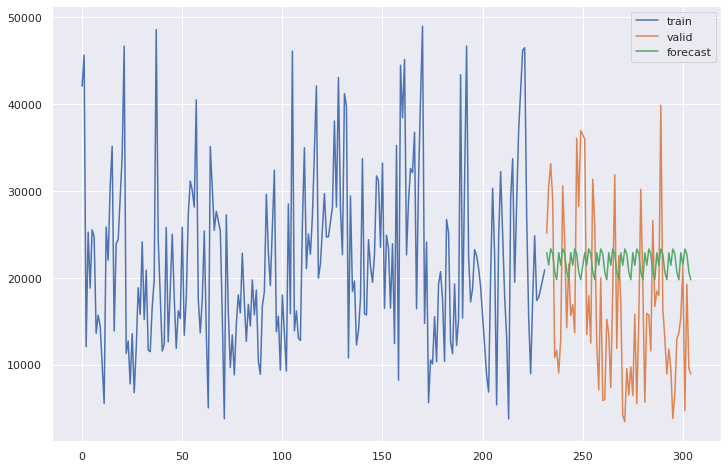

In [ ]:
plt.figure(figsize = (12,8))

plt.plot(train_data.index , train_data['Revenue'], label = 'train')
plt.plot(valid_data.index , valid_data['Revenue'], label = 'valid')
plt.plot(valid_data.index , preds, label = 'forecast')
plt.legend(loc='best')

plt.show()

SARIMA MODEL

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
adf_test(data['Revenue'])

Results of Dickey-Fuller Test:
Test Statistic                -9.014921e+00
p-value                        5.986445e-15
#Lags Used                     1.000000e+00
Number of Observations Used    2.900000e+02
Critical Value (1%)           -3.453102e+00
Critical Value (5%)           -2.871559e+00
Critical Value (10%)          -2.572108e+00
dtype: float64


If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). We can see test statistics is less than critical value, its stationary, no need of making series stationary

In [ ]:
#making series stationary
#def inverse_boxcox(y, lambda_):
#    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)
#from scipy import stats
#train_data['Revenue'], lambda_ar = stats.boxcox(train_data['Revenue'])
#lambda_ar
#train_data['Revenue']=train_data['Revenue']-train_data['Revenue'].shift(6)

No handles with labels found to put in legend.


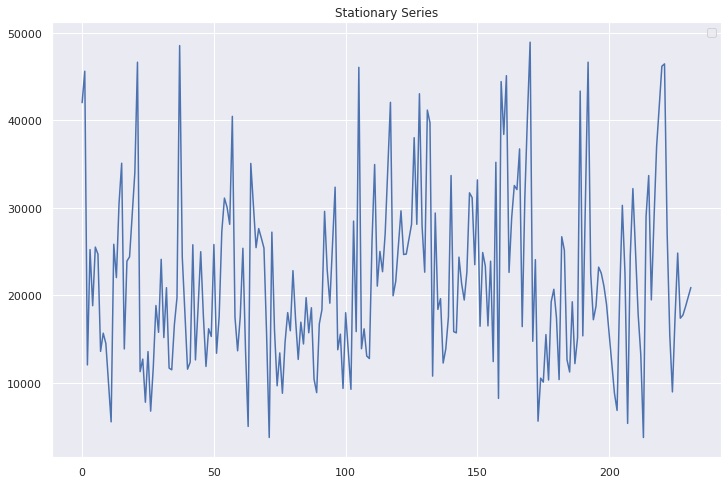

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Revenue'])

plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [ ]:
from statsmodels.tsa.statespace import sarimax
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

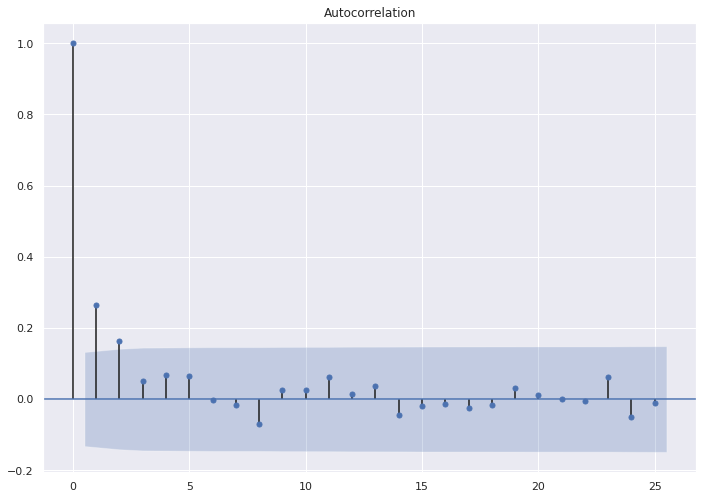

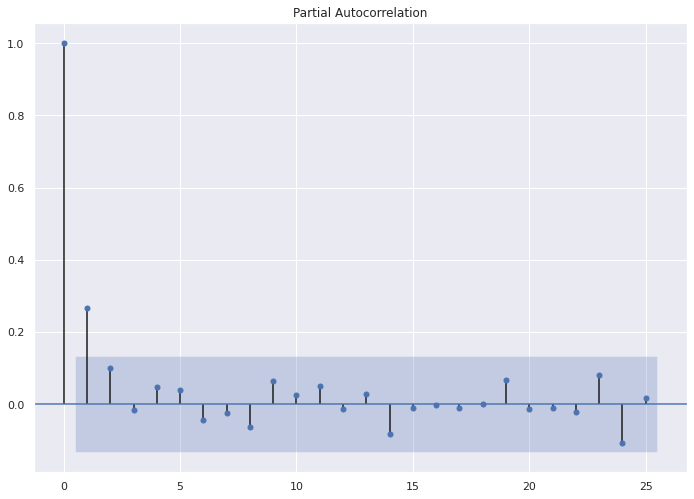

In [ ]:
plot_acf(train_data['Revenue'].dropna(), lags=25)
plot_pacf(train_data['Revenue'].dropna(), lags=25)
plt.show()

In [ ]:
model = sarimax.SARIMAX(train_data['Revenue'], seasonal_order=(1,1,2,6), order=(1,1,2))
model = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# predictions and evaluation
end = len(train_data) + len(valid_data)
preds = model.predict(start=0, end=end)[len(train_data)+1:]
preds = (preds.reset_index())[0] # storing validation predictions

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
score = rmsle(valid_data['Revenue'], preds)
print('RMSLE for SARIMA model Forecasts is', score)

RMSLE for SARIMA model Forecasts is 75.89464738191015


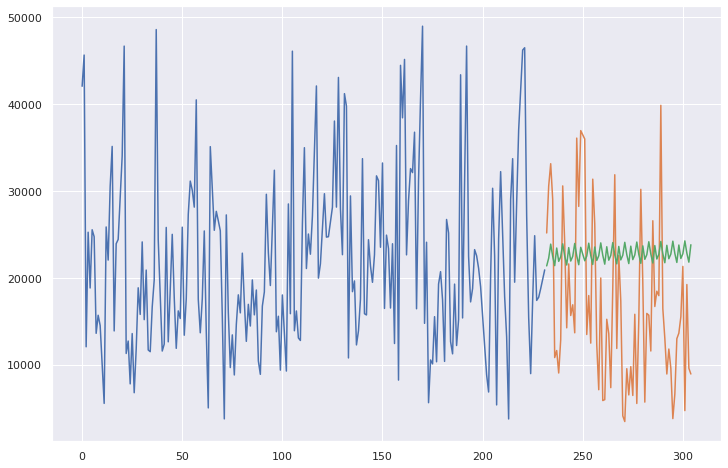

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train_data.index, train_data['Revenue'], label = 'train')
plt.plot(valid_data.index, valid_data['Revenue'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

lets do linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_train = train_data.drop(['Revenue','weekday_name'], axis=1)
y_train = train_data['Revenue']

x_valid = valid_data.drop(['Revenue', 'weekday_name'], axis=1)
y_valid = valid_data['Revenue']

In [ ]:
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)
preds = model.predict(x_valid)

# results
score = rmsle(y_valid, preds)

print('RMSLE for Linear Regression is', score)

RMSLE for Linear Regression is 63.52187252967506


In [ ]:
feature_coeff = pd.DataFrame(zip(x_train.columns, model.coef_), columns=['Feature', 'coeff'])
feature_coeff

,Feature,coeff
0,year,6188.460180
1,month,-20166.201178
2,day,-813.704915
3,weekday,-153.993399
4,dayofyear,356.566097
5,week,2506.593843
6,quarter,414.725421


<BarContainer object of 7 artists>

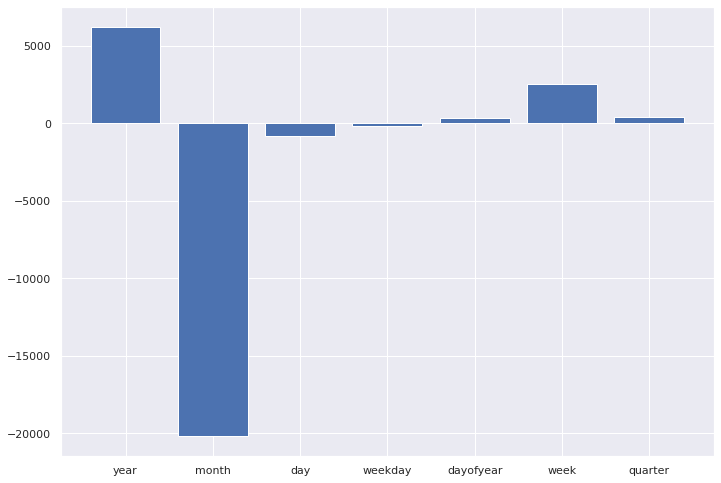

In [ ]:
plt.bar(feature_coeff['Feature'], feature_coeff['coeff'])

Regularization

In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
monthly_average = pd.DataFrame(train_data.groupby('month')['Revenue'].mean())
train_data['monthly_average'] = train_data['month'].map(monthly_average.Revenue)
valid_data['monthly_average'] = valid_data['month'].map(monthly_average.Revenue)


# week target encoding
week_average = pd.DataFrame(train_data.groupby('weekday')['Revenue'].mean())
train_data['week_average'] = train_data['weekday'].map(week_average.Revenue)
valid_data['week_average'] = valid_data['weekday'].map(week_average.Revenue)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
x_train = train_data.drop(['Revenue','weekday_name'], axis=1)
y_train = train_data['Revenue']

x_valid = valid_data.drop(['Revenue', 'weekday_name'], axis=1)
y_valid = valid_data['Revenue']

In [ ]:
for alpha in [0.01, 0.05, 0.1, 0.5, 1, 5]:
    print('----- ----- ----- ----- -----')
    print('At alpha value:', alpha)

    #training the model
    model = Ridge(alpha = alpha, normalize=True)
    model.fit(x_train, y_train)

    # predictions 
    preds = model.predict(x_valid)
    score = rmsle(y_valid, preds)

    # results
    print('Linear Regression error is', score)

----- ----- ----- ----- -----
At alpha value: 0.01
Linear Regression error is 53.585260371456734
----- ----- ----- ----- -----
At alpha value: 0.05
Linear Regression error is 53.723734538689804
----- ----- ----- ----- -----
At alpha value: 0.1
Linear Regression error is 54.01089167369031
----- ----- ----- ----- -----
At alpha value: 0.5
Linear Regression error is 56.845193030769714
----- ----- ----- ----- -----
At alpha value: 1
Linear Regression error is 59.62865967126005
----- ----- ----- ----- -----
At alpha value: 5
Linear Regression error is 67.14567756526387


In [ ]:
#training the model
model = Ridge(alpha = 0.5, normalize=True)
model.fit(x_train, y_train)

# predictions 
preds = model.predict(x_valid)
score = rmsle(y_valid, preds)

# results
print('Linear Regression error is', score)

Linear Regression error is 56.845193030769714


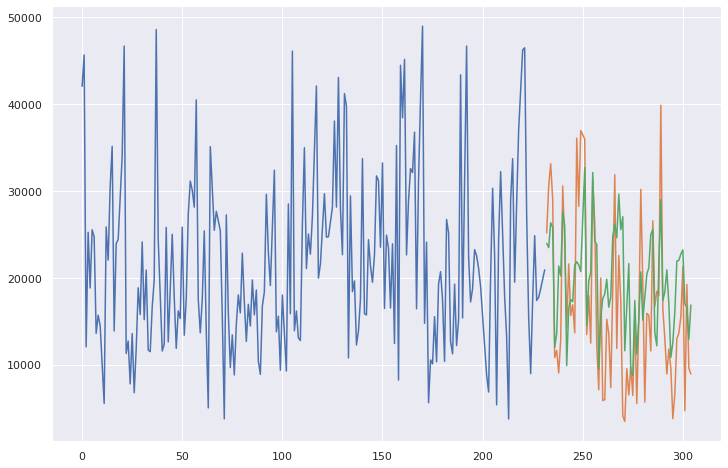

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train_data.index, train_data['Revenue'], label = 'train')
plt.plot(valid_data.index, valid_data['Revenue'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

In [ ]:
feature_coeff = pd.DataFrame(zip(x_train.columns, model.coef_), columns=['Feature', 'coeff'])
feature_coeff

,Feature,coeff
0,year,3092.711267
1,month,231.844524
2,day,-68.308185
3,weekday,-183.632417
4,dayofyear,7.220724
5,week,51.200797
6,quarter,658.905452
7,monthly_average,0.400786
8,week_average,0.654447


seems overfitting

<BarContainer object of 9 artists>

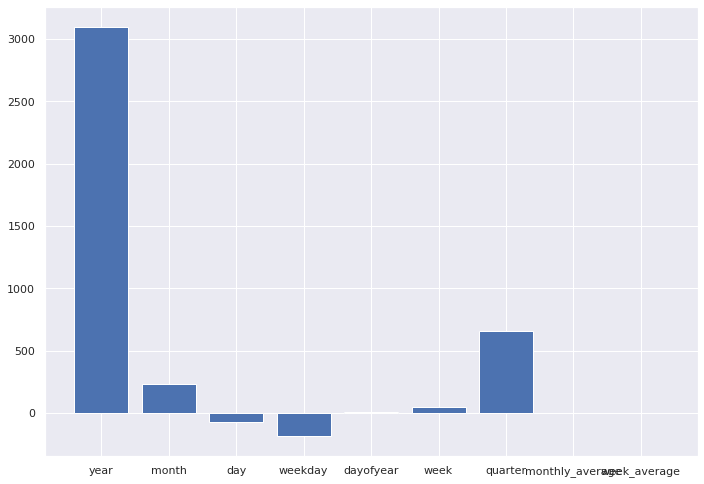

In [ ]:
plt.bar(feature_coeff['Feature'], feature_coeff['coeff'])

Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split = 25, random_state=0)
model.fit(x_train, y_train)
    
# predictions 
preds = model.predict(x_valid)

score = rmsle(y_valid, preds)
   
# results
print('Average Error is',score)

Average Error is 53.755804934972986


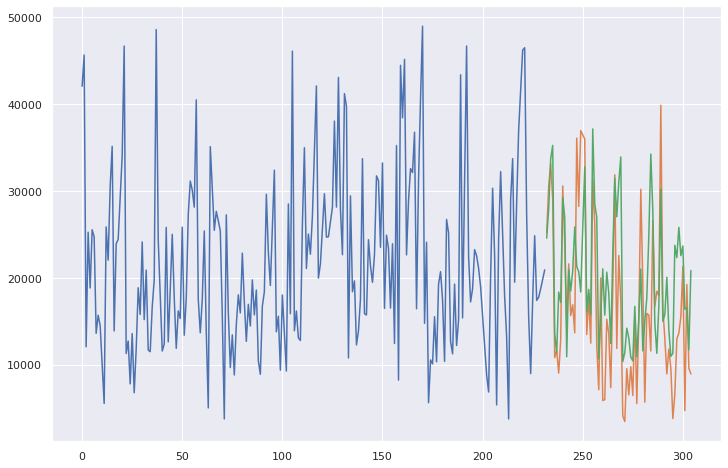

In [ ]:
plt.figure(figsize = (12,8))

plt.plot(train_data.index, train_data['Revenue'], label = 'train')
plt.plot(valid_data.index, valid_data['Revenue'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

Text(0.5, 0, 'Relative Importance')

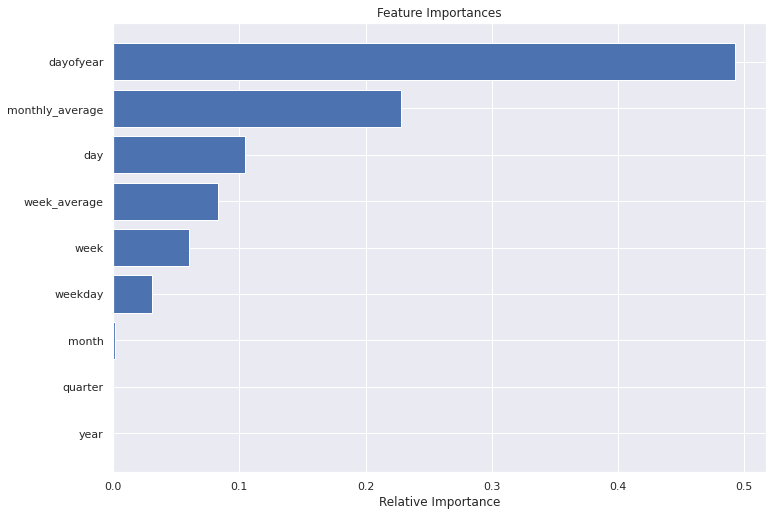

In [ ]:
features = x_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Hyperparameter

In [ ]:
model = RandomForestRegressor(random_state=0)

In [ ]:
# setting initial values and some bounds for them
n_estimator = [70, 100, 130, 150]
max_depth =  [5, 6, 7, 8, 9]
min_samples_split = [20, 30, 50]


# creating list with all the possible combinations of parameters
parameters = product(n_estimator, max_depth, min_samples_split)
parameters_list = list(parameters)
len(parameters_list)

60

In [ ]:
def grid_search(parameters_list):
    
    results = []
    best_error_ = float("inf")

    for param in tqdm_notebook(parameters_list):
        
        #training the model
        model = RandomForestRegressor(n_estimators=param[0], max_depth=param[1], min_samples_split = param[2], random_state=0)
        model.fit(x_train, y_train)

        # predictions 
        preds = model.predict(x_valid)

        # predictions and evaluation
        score = rmsle(y_valid, preds)
        
        # saving best model, rmse and parameters
        if score < best_error_:
            best_model = model
            best_error_ = score
            best_param = param
        results.append([param, score])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'score']
    
    
    # sorting in ascending order, the lower rmse is - the better
    result_table = result_table.sort_values(by='score', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
grid_search(parameters_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,parameters,score
0,"(70, 8, 20)",52.890935
1,"(70, 9, 20)",52.919816
2,"(70, 6, 20)",53.013922
3,"(70, 5, 20)",53.016869
4,"(70, 7, 20)",53.104758
5,"(100, 8, 20)",53.314616
6,"(100, 9, 20)",53.333599
7,"(100, 6, 20)",53.438961
8,"(100, 5, 20)",53.451044
9,"(100, 7, 20)",53.476063


In [ ]:
#training the model
model = RandomForestRegressor(n_estimators=150, max_depth=9, min_samples_split = 50, random_state=0)
model.fit(x_train, y_train)
    
# predictions 
preds = model.predict(x_valid)

score = rmsle(y_valid, preds)
   
# results
print('Average Error is',score)

Average Error is 60.0936043046663


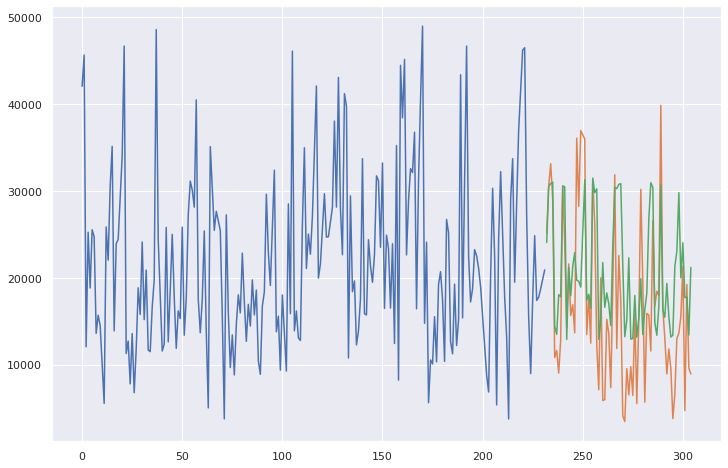

In [ ]:
plt.figure(figsize = (12,8))

plt.plot(train_data.index, train_data['Revenue'], label = 'train')
plt.plot(valid_data.index, valid_data['Revenue'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

Forecast for next 6 months

In [ ]:
test_set = pd.DataFrame(data = pd.date_range(start = '2012-01-01', end= '2012-06-30', freq = 'D'),
                        columns=['Date'])
test_set.head()

,Date
0,2012-01-01
1,2012-01-02
2,2012-01-03
3,2012-01-04
4,2012-01-05


In [ ]:
test = pd.DataFrame({"Date":test_set['Date'],
    "year": pd.to_datetime(test_set['Date']).dt.year,
                          "month": pd.to_datetime(test_set['Date']).dt.month,
                          "day": pd.to_datetime(test_set['Date']).dt.day,
                          "weekday": pd.to_datetime(test_set['Date']).dt.dayofweek,
                          "weekday_name": pd.to_datetime(test_set['Date']).dt.strftime("%A"),
                          "dayofyear": pd.to_datetime(test_set['Date']).dt.dayofyear,
                          "dayofyear": pd.to_datetime(test_set['Date']).dt.dayofyear,
                          "dayofyear": pd.to_datetime(test_set['Date']).dt.dayofyear,
                          "week": pd.to_datetime(test_set['Date']).dt.week,
                          "quarter": pd.to_datetime(test_set['Date']).dt.quarter,
                         })

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
test.head()

,Date,year,month,day,weekday,weekday_name,dayofyear,week,quarter
0,2012-01-01,2012,1,1,6,Sunday,1,52,1
1,2012-01-02,2012,1,2,0,Monday,2,1,1
2,2012-01-03,2012,1,3,1,Tuesday,3,1,1
3,2012-01-04,2012,1,4,2,Wednesday,4,1,1
4,2012-01-05,2012,1,5,3,Thursday,5,1,1


In [ ]:
# month level encoding
monthly_average = pd.DataFrame(data.groupby('month')['Revenue'].mean())
data['monthly_average'] = data['month'].map(monthly_average.Revenue)
test['monthly_average'] = test['month'].map(monthly_average.Revenue)


# week target encoding
week_average = pd.DataFrame(data.groupby('weekday')['Revenue'].mean())
data['week_average'] = data['weekday'].map(week_average.Revenue)
test['week_average'] = test['weekday'].map(week_average.Revenue)

In [ ]:
test.isnull().sum()

Date               0
year               0
month              0
day                0
weekday            0
weekday_name       0
dayofyear          0
week               0
quarter            0
monthly_average    0
week_average       0
Revenue            0
dtype: int64

In [ ]:
test.dropna(axis=0, inplace = True)

In [ ]:
x_train = data.drop(['Revenue', 'weekday_name'], axis=1)
y_train = data['Revenue']

x_valid = test.drop(['weekday_name', 'Date'], axis=1)

Random forest

In [ ]:
model = RandomForestRegressor(n_estimators=150, max_depth=9, min_samples_split = 50, random_state=0)
model.fit(x_train, y_train)
    
# predictions 
preds = model.predict(x_valid)

In [ ]:
test['Revenue'] = preds

In [ ]:
test['Revenue']=(test['Revenue']-test['Revenue'].min())/(test['Revenue'].max()-test['Revenue'].min())

In [ ]:
test['Revenue'].min()

0.0

In [ ]:
def norm(data):
  x=data.min()
  y=data.max()
  for i in range(len(data)):
    data[i]=(data[i]-x)/(y-x)
  return data
   

In [ ]:
norm(test['monthly_average'])

In [ ]:
data['Revenue']=(data['Revenue']-data['Revenue'].min())/(data['Revenue'].max()-data['Revenue'].min())

In [ ]:
test.describe()

,year,month,day,weekday,dayofyear,week,quarter,monthly_average,week_average,Revenue
count,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000
mean,2012.0,3.487179,15.564103,2.666667,91.000000,13.666667,1.50000,16942.693275,20577.939868,0.477134
std,0.0,1.713277,8.793824,1.978378,52.696942,8.070922,0.50161,2634.329700,3805.287068,0.276665
min,2012.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,13010.202609,13746.218620,0.000000
25%,2012.0,2.000000,8.000000,1.000000,45.750000,7.000000,1.00000,14535.567917,18987.975531,0.313555
50%,2012.0,3.500000,15.500000,2.500000,91.000000,13.500000,1.50000,17431.547061,21168.721703,0.432298
75%,2012.0,5.000000,23.000000,4.000000,136.250000,20.000000,2.00000,18173.432692,22122.865122,0.673696
max,2012.0,6.000000,31.000000,6.000000,181.000000,52.000000,2.00000,21022.934000,26273.136531,1.000000
